# Calibration, volatilité locale et stochastique - TP
(Stefano De Marco)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Calibration of an implied volatility parameterization to a market smile

We consider end-of-day option quotes for the CAC40 index, date = 2 October 2013, maturity = 20 June 2014.

$\blacktriangleright$ We import quotes (strikes, mid call and mid put prices) from csv file.

In [3]:
quotes = np.loadtxt(open("CAC40_last_option_quotes_2_oct_2013_maturity_20_june_2014.csv", "r"), delimiter=",", skiprows=1)

strikes = quotes[:, 0]
call_prices = quotes[:, 1]
put_prices = quotes[:, 2]

maturity = 258./365

print("Strikes: ", strikes)
print("Call prices: ", call_prices)
print("Put prices: ", put_prices, "\n")

print("Maturity (years): %1.2f" %maturity)

Strikes:  [3500. 3700. 3800. 3900. 3950. 4000. 4050. 4100. 4150. 4200. 4250. 4300.
 4350. 4400. 4500. 4600. 4800.]
Call prices:  [621.68 466.8  394.99 328.19 296.73 266.93 241.23 214.35 188.95 166.2
 145.25 126.05 108.55  92.85  66.4   46.15  21.  ]
Put prices:  [ 87.72 132.45 160.45 193.45 211.9  232.   256.2  279.22 303.73 330.88
 359.83 390.53 422.94 457.14 530.5  610.05 784.51] 

Maturity (years): 0.71


$\blacktriangleright$ Let us have a look at the price quotes

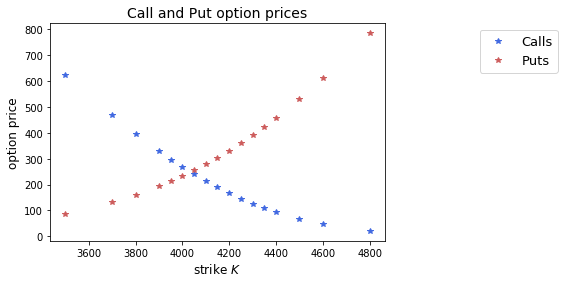

In [4]:
plt.plot(strikes, call_prices, color='royalblue', linewidth=0., marker="*", label="Calls")
plt.plot(strikes, put_prices, color='indianred', linewidth=0., marker="*", label="Puts")

plt.xlabel("strike $K$", fontsize=12)
plt.ylabel("option price", fontsize=12)
plt.title("Call and Put option prices", fontsize=14)

plt.legend(loc=9, fontsize=13, bbox_to_anchor=(1.4, 1.0), ncol=1)

#### $\blacktriangleright$ We test put-call parity, and determine the discount factor and the forward value from option quotes

#### $\blacktriangleright$ TO DO: recall theoretical parity relation for call and put prices without arbitrage,
in terms of forward price $F_0^T$ and discount factor $B(0,T) = e^{-r T}$

$$
\mathrm{Call}(K) - \mathrm{Put}(K) = B(0,T) (F_0^T - K)
\qquad \forall \, K.
$$

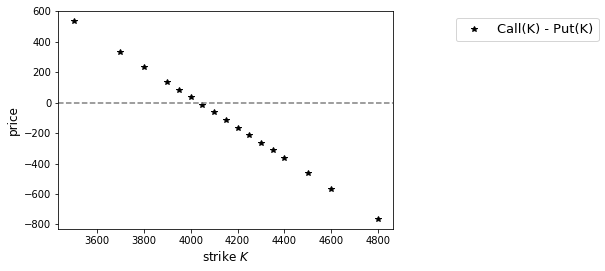

In [5]:
########################################################
## TO DO: stock the vector of values of Call(K) - Put(K) 
## in the array call_minus_put
#########################################################
call_minus_put = call_prices - put_prices

plt.plot(strikes, call_minus_put, color='black', linewidth=0., marker="*", label="Call(K) - Put(K)")

plt.xlabel(r"strike $K$", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.axhline(0, color='grey', linestyle="--")

plt.legend(loc=9, fontsize=13, bbox_to_anchor=(1.4, 1.0), ncol=1)

#### $\blacktriangleright$ TO DO: perform a linear regression so to determine the discount factor and the forward value

We determine the slope $b$ and the intercept $a$ of the linear function that best interpolates the values of $\mathrm{Call}(K) - \mathrm{Put}(K)$:

$$
f(K) = a + b \, K.
$$

This gives a way of setting the discount factor and the forward for the maturity $T$ we are working with:

$$
B(0,T) = -b
\qquad
F_0^T = \frac a {B(0,T)} = - \frac a b  \qquad \mbox{(in terms of $a$ and $b$)}
$$

Slope = -0.998
Intercept =: 4027.15
Correlation coefficient = -0.999999999964 

Therefore: 

B(0,T) = 0.998
Forward value F_T = 4035.00


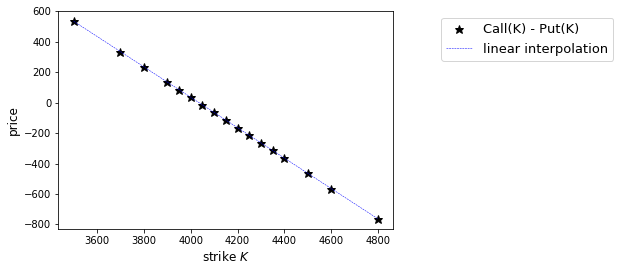

In [7]:
import scipy.stats as sps

#########################################################
## TO DO: use the function linregress of scipy.stats 
## to regress the values of  Call(K) - Put(K) against the 
## strikes 
#########################################################

(slope, intercept, rvalue, other_value1, other_value2) = sps.linregress( strikes , call_minus_put )

print("Slope = %1.3f" %slope)
print("Intercept =: %1.2f" %intercept)
print("Correlation coefficient = %1.12f \n" %rvalue)

##############################################
## TO DO: complete with the value of B(0,T) 
## and the forward value F(0,T)
##############################################

zcb_price = - slope

F_T = intercept / zcb_price

print("Therefore: \n")
print("B(0,T) = %1.3f" %zcb_price)
print("Forward value F_T = %1.2f" %F_T)

##############################################
# Let us plot the result of linear regression
##############################################
plt.plot(strikes, call_minus_put, color='black', linewidth=0., marker="*", markersize=9, label="Call(K) - Put(K)")
plt.plot(strikes, intercept + slope*strikes, color='blue', linestyle ="--", linewidth=0.5, label="linear interpolation")

plt.xlabel(r"strike $K$", fontsize=12)
plt.ylabel("price", fontsize=12)

plt.legend(loc=9, fontsize=13, bbox_to_anchor=(1.4, 1.0), ncol=1)


#### $\blacktriangleright$ TO DO: evaluate the implied volatility generated by the option quotes.

We are now in a good position to evaluate the implied volatility associated to the option prices. Recall that the market implied volatility $\hat \sigma(T,K)$ for maturity $T$ and strike $K$ is the unique solution to the equation

$$
Call^{\mathrm{mkt}}(T,K) = Call_{\mathrm{BS}}(T, K, F_0^T, B(0,T), \hat \sigma(T,K)),
$$

where $Call_{\mathrm{BS}}(T, K, F, D, \sigma)$ is the Black-Scholes call price for maturity $T$, strike $K$, forward value $F$, discount factor $D=e^{-rT}$ and volatility parameter $\sigma$.

We import an implied volatility solver --> contained in the python file BlackScholesFunctions.py

NOTE: the function volImplCore_Newton in BlackScholesFunctions.py can evaluate the implied volatility of a call or a put price, according to the value of the argument CallOrPutFlag

In [12]:
from BlackScholesFunctions import volImplCore_Newton

###########################
## Implied vol from puts
###########################
vols_puts = []

for i in range(strikes.size):
    K = strikes[i]
    
    #########################################################
    ## TO DO: complete the arguments of the function 
    ## volImplCore_Newton
    ## so to compute the implied volatility of the put price P(K)
    ## for the current strike
    #########################################################
    
    vol, iterations = volImplCore_Newton(tau = maturity, K = K, DF = zcb_price,
                                         
                                            F = F_T, ## required forward value
                                            price = put_prices[i],
                                            CallOrPutFlag = 0,
                                         
                                            initial_point='automatic', prix_tol = 1.e-4, max_iter=50)
    
    vols_puts = np.append(vols_puts, vol)

############################
## Implied vol from calls
############################
vols_calls = []

for i in range(strikes.size):
    K = strikes[i]
    
    #########################################################
    ## TO DO: complete the arguments of the function 
    ## volImplCore_Newton
    ## so to compute the implied volatility of the call price C(K)
    ## for the current strike
    #########################################################

    vol, iterations = volImplCore_Newton(tau = maturity, K = K, DF = zcb_price,
                                         
                                            F = F_T, ## required forward value
                                            price = call_prices[i],
                                            CallOrPutFlag = 1,
                                         
                                            initial_point='automatic', prix_tol = 1.e-4, max_iter=50)
    
    vols_calls = np.append(vols_calls, vol)

$\blacktriangleright$ Plot the resulting smile:

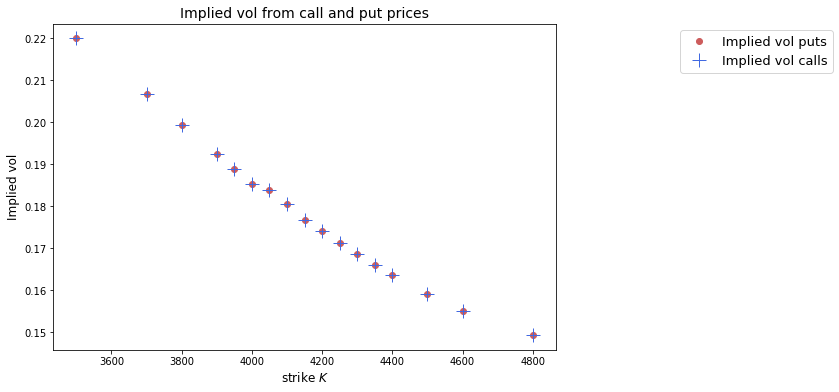

In [13]:
plt.figure(figsize=(9,6))

plt.plot(strikes, vols_puts ,
        color='indianred', linewidth=0., marker=".", markersize=12, label="Implied vol puts")

plt.plot(strikes, vols_calls ,
         color='royalblue', linewidth=0., marker="+", markersize=14, label="Implied vol calls")

plt.xlabel("strike $K$", fontsize=12)
plt.ylabel("Implied vol", fontsize=12)
plt.title("Implied vol from call and put prices", fontsize=14)

plt.legend(loc=9, fontsize=13, bbox_to_anchor=(1.4, 1.0), ncol=1)

$\blacktriangleright$ In terms of log-forward moneyness $k = \log(K / F_0^T)$:

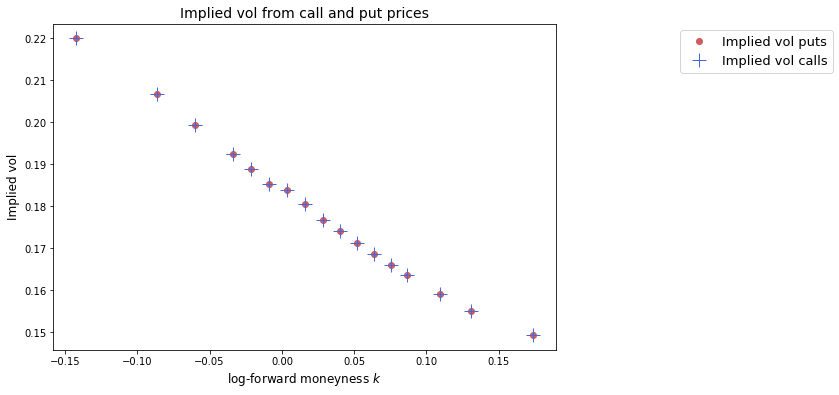

In [14]:
plt.figure(figsize=(9,6))

mkt_log_mon = np.log( strikes / F_T )

plt.plot(mkt_log_mon, vols_puts ,
         color='indianred', linewidth=0., marker=".", markersize=12, label="Implied vol puts")

plt.plot(mkt_log_mon, vols_calls ,
         color='royalblue', linewidth=0., marker="+", markersize=14, label="Implied vol calls")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Implied vol", fontsize=12)
plt.title("Implied vol from call and put prices", fontsize=14)

plt.legend(loc=9, fontsize=13, bbox_to_anchor=(1.4, 1.0), ncol=1)

## The SVI parameterisation

#### $\blacktriangleright$ Implied total variance

The implied total variance $w(T,k)$ for maturity $T$ and log-forward moneyness $k$ is defined by

$$
w(T,k) = T \, \hat \sigma^2(T, k)
$$

where (with a slight abuse of notation with respect to the notation above) $\hat \sigma(T, k)$ is the implied volatility for the same maturity and log-forward moneyness.


#### $\blacktriangleright$ The SVI (Stochastic Volatility Inspired) parameterisation

SVI is a parametric family of functions proposed by [Gatheral 2004] to model the total implied variance smile for a fixed maturity $T$ :

\begin{equation}
w_\mathrm{SVI}(k) = a + b \left(\rho (k - \bar k) + \sqrt{(k - \bar k)^2 + \sigma^2} \right),
\qquad k \in \mathbb R,
\end{equation}

where the parameters $(a, b, \rho, \bar k, \sigma)$ satisfy

$$
b > 0 \qquad \quad \rho \in [-1,1] \qquad \quad \sigma > 0, \qquad \quad a, \bar k \in \mathbb R.
$$

Note that, since $\min_{k \in \mathbb R} w_\mathrm{SVI}(k) = a + b \, \sigma \, \sqrt{1 - \rho^2}$, we also have to impose the condition

$$
a + b \, \sigma \, \sqrt{1 - \rho^2} > 0
$$

in order to grant positivity of the function $w_\mathrm{SVI}$.

### To Do: fit an SVI parameterisation to the market quotes

We want to find a parameter set $(a^*, b^*, \rho^*, \bar k^*, \sigma^*)$ that best fits the observed values $w^{\mathrm{mkt}}$.

We formulate this calibration problem as a least-square problem:

$$
\min_{(a,b,\rho,\bar k,\sigma)}
\sum_{i} \left( w^{\mathrm{mkt}}(k_i) - w_\mathrm{SVI} \left(k_i \, ; a,b,\rho,\bar k,\sigma \right) \right)^2
$$

where the $k_i$ are the observed log-moneyness points and $w^{\mathrm{mkt}}(k_i) = T \bigl( \hat \sigma^{\mathrm{mkt}}(k_i) \bigr)^2$ the observed values of total implied variance.

$\blacktriangleright$ The problem above is a constrained optimization problem.
Some of the constraints on the parameter set are easy to impose (they are "box constraints"):

$$
b > 0 \qquad \quad \rho \in [-1,1] \qquad \quad \sigma > 0
$$

while the positivity constraint

$$
a + b \, \sigma \, \sqrt{1 - \rho^2} > 0
$$

is slightly more involved.

$\blacktriangleright$ We decide to replace the positivity constraint $a + b \, \sigma \, \sqrt{1 - \rho^2} > 0$ with the condition

$$
a > 0
$$

which is stronger, but we accept to make this restriction.

$\blacktriangleright$ There would be other constraints, relate to no-arbitrage conditions: we want to guarantee that the interpolation and extrapolation of the observed market variances provided by the function $w_\mathrm{SVI}$ does not generate arbitrage opportunities (in other words: we want the call price $K \mapsto Call_{\mathrm{BS}} \Bigl(T, K, F_0^T, B(0,T), \frac 1{\sqrt{T}} \sqrt{w_\mathrm{SVI} \Bigl(\log \frac K{F_0^T}\Bigr)} \Bigr)$ to be a true call price without arbitrage).

This point will be discussed in detail in a future lecture.

$\blacktriangleright$ For the moment, we just accept to neglect such no-arbitrage constraints and fit the SVI parameterisation as it is.

$\blacktriangleright$ Finally, we will cap the positive parameters $a,b,\sigma$ at some reasonably high levels $a_{\mathrm{max}}, b_{\mathrm{max}}, \sigma_{\mathrm{max}}$.

#### We  make a try with the function least_squares from the library scipy.optimize

In [15]:
import scipy.optimize as opt

def SVI(k, a, b , rho, k_bar, sig):
    total_variance = a + b*( rho*(k - k_bar) + np.sqrt( (k - k_bar)*(k - k_bar) + sig*sig) )
    
    return total_variance

def SVI_two_arguments(theta, k):
    ## Attention à l'ordre des paramètres...
    a, b , rho, k_bar, sig = theta
    
    return SVI(k, a, b , rho, k_bar, sig)

def fct_least_squares(theta, log_mon, tot_implied_variance):
    """
    theta                : the vector of SVI parameters
    log_mon              : log-forward moneyness k (float or double)
    tot_implied_variance : the target total implied variance (float or double)
    
    returns : the objective function to inject in the least-square problem
    """
    return SVI_two_arguments(theta, log_mon) - tot_implied_variance

$\blacktriangleright$  We have to choose a starting point for the minimum search:

In [17]:
## Our target is the vector of total variances from (call or put) price quotes
mkt_tot_variance = maturity * vols_calls**2

## Choice of initial point
a_init = np.min(mkt_tot_variance) / 2
b_init = 0.1
rho_init = -0.8
k_bar_init = 0.
sig_init = 0.1

$\blacktriangleright$ Let us have a look at our initial guess for SVI:

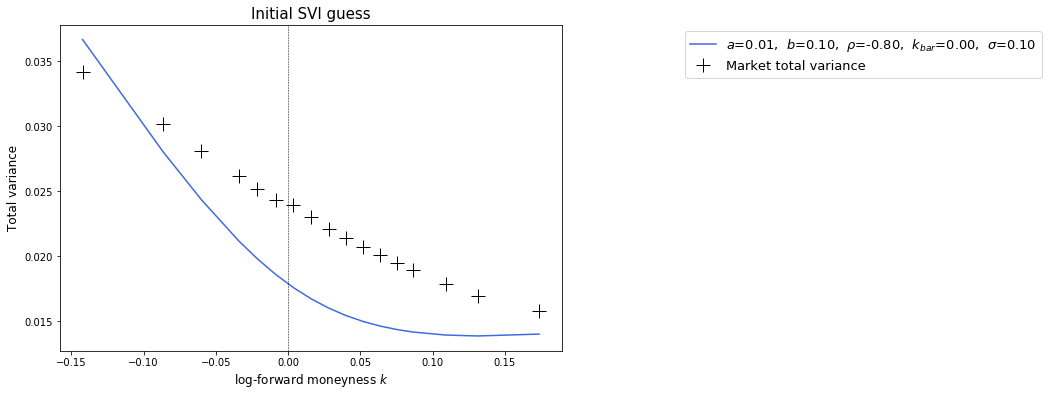

In [18]:
## Recall that our vector of market values for log-forward moneyness: mkt_log_mon
## has been defined above

################################
## Plot of initial SVI guess
################################
plt.figure(figsize=(9,6))

total_variances_init = SVI(mkt_log_mon , a_init, b_init, rho_init, k_bar_init, sig_init)

plt.plot(mkt_log_mon, total_variances_init,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_init,b_init,rho_init,k_bar_init,sig_init))

plt.plot(mkt_log_mon, mkt_tot_variance,
         color='black', linewidth=0., marker="+", markersize=14, label="Market total variance")

plt.axvline(0., linestyle="--", linewidth=0.5, color="k")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Total variance", fontsize=12)
plt.title(r"Initial SVI guess", fontsize=15)

plt.legend(loc=9, fontsize=13, bbox_to_anchor=(1.6, 1.0), ncol=1)

#### $\blacktriangleright$ TO DO: run the function least_squares from scipy.optimize

In [20]:
################################################
## The bounds we impose on the SVI parameters
## 
## Reminder: the order is a, b , rho, k_bar, sig
################################################
lower = np.array([0., 0., -1., -0.5, 0.])

upper = np.array([np.max(mkt_tot_variance), 2., 1., 0.5, 1.])

SVI_param_bounds = (lower, upper)

theta_init = np.array([a_init, b_init, rho_init, k_bar_init, sig_init])

###################################################################
## TO DO: apply the least squares method
## 
## - to the objective function to be minimized
## - using theta_init as the starting point for the search
## - imposing the bounds we defined above
###################################################################

result = opt.least_squares(fun = fct_least_squares ,
                           x0 = theta_init , 
                           bounds = SVI_param_bounds ,
                           args = (mkt_log_mon, mkt_tot_variance), #additional arguments for the LS objective
                           verbose = 1)

## The optimized parameters
a_star, b_star, rho_star, k_bar_star, sig_star = result.x

`gtol` termination condition is satisfied.
Function evaluations 76, initial cost 2.0068e-04, final cost 8.4088e-08, first-order optimality 8.91e-11.


$\blacktriangleright$ Have a look at our SVI fit of implied variance:

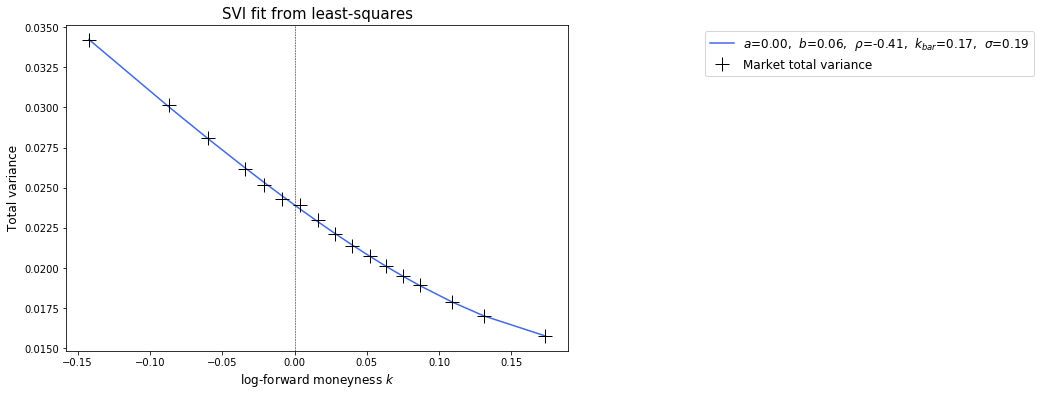

In [22]:
#######################################
## Plot of SVI fit from least squares
##
## TO DO: complete with the plot of the
## calibrated SVI and the market implied 
## variances for comparison
#######################################

total_variances_fit = SVI_two_arguments(result.x, mkt_log_mon)


plt.figure(figsize=(9,6))

plt.plot(mkt_log_mon, total_variances_fit,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_star, b_star, rho_star, k_bar_star, sig_star))

plt.plot(mkt_log_mon, mkt_tot_variance ,
         color='black', linewidth=0., marker="+", markersize=14, label="Market total variance")


plt.axvline(0., linestyle="--", linewidth=0.5, color="k")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Total variance", fontsize=12)
plt.title(r"SVI fit from least-squares", fontsize=15)

plt.legend(loc=9, fontsize=12, bbox_to_anchor=(1.6, 1.0), ncol=1)

#### How does the result look like?

The fit of implied volatility:

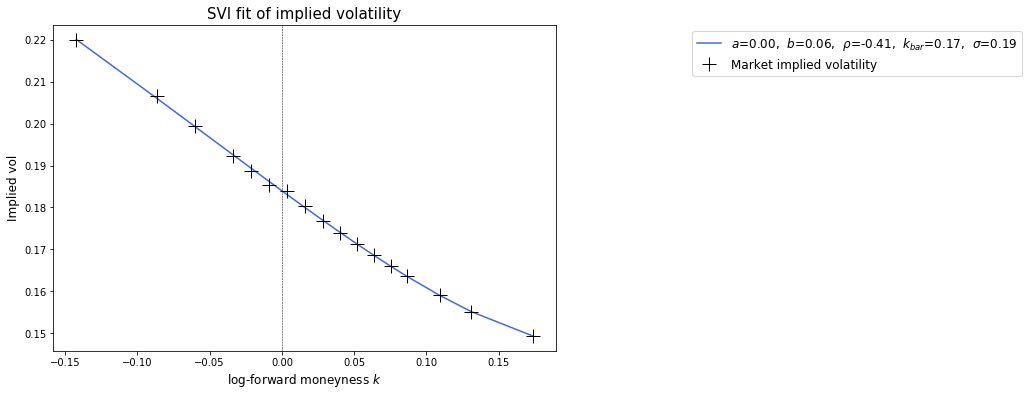

In [23]:
#####################################
## Plot of SVI fit of implied vol
#####################################
implied_vols_fit = np.sqrt( total_variances_fit / maturity )

plt.figure(figsize=(9,6))

plt.plot(mkt_log_mon, implied_vols_fit ,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_star, b_star, rho_star, k_bar_star, sig_star))

plt.plot(mkt_log_mon, vols_calls ,
         color='black', linewidth=0., marker="+", markersize=14, label="Market implied volatility")

plt.axvline(0., linestyle="--", linewidth=0.5, color="k")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Implied vol", fontsize=12)
plt.title(r"SVI fit of implied volatility", fontsize=15)

plt.legend(loc=9, fontsize=12, bbox_to_anchor=(1.6, 1.0), ncol=1)

#### $\blacktriangleright$  Delayed option quotes on the SP500 index

can be downloaded freely from the the [CBOE quotes platform](http://www.cboe.com/delayedquote/quote-table)  (index symbol: SPX).

You can download option quotes for different maturities (the standard monthly maturity for the SPX option market being the third Friday of each month) and try the same SVI calibration as above.
